IMDB映画レビューデータセットの準備

In [ ]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# 解凍
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup
# IMDBデータセットの説明を表示
!cat aclImdb/README

--2021-08-24 02:33:46--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  22.2MB/s    in 4.2s    

2021-08-24 02:33:50 (19.2 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

scikit-learnのload_filesを用いて読み込み

In [ ]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [ ]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [ ]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

scikit-learnのCountVectorizer(BoW)を使用してみる

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [ ]:
# ngram_rangeで利用するn-gramの範囲を指定する
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


【問題1】BoWのスクラッチ実装  
１つずつ実行し動きを確認し、最後にクラスの作成を行っている

In [ ]:
mini_dataset_1 = \
  ["This movie is SOOOO funny!!!.",
  "What a movie! I never.",
  "best movie ever!!!!! this movie."]

In [ ]:
type(mini_dataset_1)

list

In [ ]:
mini_dataset_1
target="!"
target2="."
list_a=[]
list_b=[]
list_c=[]

# [!]を削除
for i in range(len(mini_dataset_1)):
  a = [item for item in mini_dataset_1[i] if item != target]
  b="".join(a)
  list_a.append(b)

# [].]を削除
for l in range(len(list_a)):
  a = [item for item in list_a[l] if item != target2]
  b="".join(a)
  list_b.append(b)


In [ ]:
list_c=[]
for p in range(len(list_b)):
  c=list_b[p].strip().split()
  list_c.append(c)

list_d=[]
for p in range(len(list_c)):
  for j,k in enumerate(list_c[p]):
    list_d.append(k)

In [ ]:
list_e = list(map(str.lower,list_d))
list_f=sorted(set(list_e), key=list_e.index)

In [ ]:
import numpy as np
import pandas as pd
list_count=np.array([])

for k in range(len(list_b)):
  list_b_1 = list(map(str.lower,list_b))
  c=list_b_1[k].strip().split()
  list_count2=np.array(np.zeros(len(list_f)))
  for i in range(len(c)):
    for j in range(len(list_f)):
      list_count1=np.array(np.zeros(len(list_f)))
      if c[i]==list_f[j] :
        list_count1[j]=1
      else:
        list_count1[j]=0
      list_count3=list_count2+list_count1
      list_count2=list_count3
  list_count=np.append(list_count,list_count3)
Bow_sample=list_count.reshape(len(list_b),-1)

Bow_sample=Bow_sample.astype(int)
df = pd.DataFrame(Bow_sample, columns=list_f)
display(df)

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,1,0,0
2,1,2,0,0,0,0,0,0,0,1,1


In [ ]:
class Bow_sample():
  def Bow_fit(self,list_txt):
    import numpy as np
    import pandas as pd
    target="!"
    target2="."

    # [!]を削除
    list_a=[]
    for i in range(len(list_txt)):
      a = [item for item in mini_dataset_1[i] if item != target]
      b="".join(a)
      list_a.append(b)

    # [.]を削除
    list_b=[]
    for l in range(len(list_a)):
      a = [item for item in list_a[l] if item != target2]
      b="".join(a)
      list_b.append(b)

    list_c=[]
    for p in range(len(list_b)):
      c=list_b[p].strip().split()
      list_c.append(c)

    list_d=[]
    for p in range(len(list_c)):
      for j,k in enumerate(list_c[p]):
        list_d.append(k)

    list_e = list(map(str.lower,list_d))
    list_f=sorted(set(list_e), key=list_e.index)

    list_count=np.array([])
    for k in range(len(list_b)):
      list_b_1 = list(map(str.lower,list_b))
      c=list_b_1[k].strip().split()
      list_count2=np.array(np.zeros(len(list_f)))
      for i in range(len(c)):
        for j in range(len(list_f)):
          list_count1=np.array(np.zeros(len(list_f)))
          if c[i]==list_f[j] :
            list_count1[j]=1
          else:
            list_count1[j]=0
          list_count3=list_count2+list_count1
          list_count2=list_count3
      list_count=np.append(list_count,list_count3)
    Bow_sample=list_count.reshape(len(list_b),-1)

    # numpy配列をインスタンス変数として保存
    self.Bow_sample=Bow_sample

    Bow_sample=Bow_sample.astype(int)
    df = pd.DataFrame(Bow_sample, columns=list_f)
    return df

In [ ]:
Bow1=Bow_sample()
Bow1.Bow_fit(mini_dataset_1)

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,1,0,0
2,1,2,0,0,0,0,0,0,0,1,1


In [ ]:
Bow1.Bow_sample

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset_1)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


1-gram (unigram)に関しては、スクラッチとsklearnが同じ結果となった（単語の並び方が違った）

2-gram (unigram)を制作（出力はできたがクラスにはしていない）

In [ ]:
mini_dataset_1
target="!"
target2="."
list_a=[]
list_b=[]
list_c=[]

# [!]を削除
for i in range(len(mini_dataset_1)):
  a = [item for item in mini_dataset_1[i] if item != target]
  b="".join(a)
  list_a.append(b)

# [].]を削除
for l in range(len(list_a)):
  a = [item for item in list_a[l] if item != target2]
  b="".join(a)
  list_b.append(b)

In [ ]:
list_c=[]
for p in range(len(list_b)):
  c=list_b[p].strip().split()
  list_c.append(c)

list_d=[]
for p in range(len(list_c)):
  for j,k in enumerate(list_c[p]):
    list_d.append(k)

In [ ]:
sample1=[]
for j in range(len(list_c)):
  sample=[]
  for i in range(len(list_c[j])-1):
    sample.append(list_c[j][i])
    sample.append(list_c[j][i+1])
  sample1.append(sample)

In [ ]:
sample2=[]
for i in range(len(sample1)): 
  a=[sample1[i][m:m+2] for m in range(0,len(sample1[i]),2)]
  sample2.append(a)

In [ ]:
list_m=[]
for j in range(len(sample2)): 
  for i in range(len(sample2[j])):
    a=" ".join(sample2[j][i])
    list_m.append(a)

In [ ]:
list_o = list(map(str.lower,list_m))
list_p=sorted(set(list_o), key=list_o.index)

In [ ]:
# list_oとlist_p(比較材料、からむ)の比較

In [ ]:
list_count=np.array([])
for i in range(len(list_o)):
  list_count2=np.array(np.zeros(len(list_p)))
  for j in range(len(list_p)):
    list_count1=np.array(np.zeros(len(list_p)))
    if list_o[i]==list_p[j] :
      list_count1[j]=1
    else:
      list_count1[j]=0
    list_count3=list_count2+list_count1
    list_count2=list_count3 
  list_count=np.append(list_count,list_count3)
Bow_sample=list_count.reshape(-1,len(list_p))

In [ ]:
a=np.sum(Bow_sample[0:4,:],axis=0)
b=np.sum(Bow_sample[4:8,:],axis=0)
c=np.sum(Bow_sample[8:12,:],axis=0)
d=np.vstack([a,b,c])
d=d.astype(int)
df = pd.DataFrame(d, columns=list_p)

In [ ]:
df

,this movie,movie is,is soooo,soooo funny,what a,a movie,movie i,i never,best movie,movie ever,ever this
0,1,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,1,1,1


2-gramも出力することができた  
（columnの並びはアルファベット順ではなく、出てきた順となっている）

【問題2】TF-IDFの計算  
自分の学習のため、まずmini_dataset_1で実行し動きを確かめる

In [ ]:
mini_dataset_1 = \
  ["This movie is SOOOO funny!!!.",
  "What a movie! I never.",
  "best movie ever!!!!! this movie."]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(mini_dataset_1)
A=vectorizer.transform(mini_dataset_1)

In [ ]:
vectorizer.get_feature_names()

['best', 'ever', 'funny', 'is', 'movie', 'never', 'soooo', 'this', 'what']

In [ ]:
A.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 2, 0, 0, 1, 0]])

In [ ]:
import pandas as pd
pd.DataFrame(A.toarray(), columns=vectorizer.get_feature_names())

,best,ever,funny,is,movie,never,soooo,this,what
0,0,0,1,1,1,0,1,1,0
1,0,0,0,0,1,1,0,0,1
2,1,1,0,0,2,0,0,1,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer()
B = vectorizer2.fit_transform(mini_dataset_1)

In [ ]:
B

<3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
B.toarray()

array([[0.        , 0.        , 0.50461134, 0.50461134, 0.29803159,
        0.        , 0.50461134, 0.38376993, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.38537163,
        0.65249088, 0.        , 0.        , 0.65249088],
       [0.50165133, 0.50165133, 0.        , 0.        , 0.59256672,
        0.        , 0.        , 0.38151877, 0.        ]])

In [ ]:
vectorizer2.get_feature_names()

['best', 'ever', 'funny', 'is', 'movie', 'never', 'soooo', 'this', 'what']

In [ ]:
import pandas as pd
pd.DataFrame(B.toarray(), columns=vectorizer2.get_feature_names())

,best,ever,funny,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.504611,0.504611,0.298032,0.000000,0.504611,0.383770,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.385372,0.652491,0.000000,0.000000,0.652491
2,0.501651,0.501651,0.000000,0.000000,0.592567,0.000000,0.000000,0.381519,0.000000


ここから問題２の実行を行う

In [ ]:
# はじめて使う場合はストップワードをダウンロード
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer(stop_words=stop_words,max_features=5000,norm=None)
C = vectorizer3.fit_transform(x_train)

In [ ]:
C

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1999647 stored elements in Compressed Sparse Row format>

IMDB映画レビューデータセットをTF-IDFによりベクトル化を行うことができた

【問題3】TF-IDFを用いた学習

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.nn.sigmoid, input_shape=(5000,))])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
history = model.fit(C.toarray(), y_train,
                    batch_size=10,
                    epochs=10,
                    verbose=1)

Epoch 1/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.2741 - accuracy: 0.8239
Epoch 2/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2018 - accuracy: 0.8683
Epoch 3/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1739 - accuracy: 0.8835
Epoch 4/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.1286 - accuracy: 0.8913
Epoch 5/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.1500 - accuracy: 0.8938
Epoch 6/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0587 - accuracy: 0.9042
Epoch 7/10
2500/2500 [==============================] - 4s 1ms/step - loss: 1.1073 - accuracy: 0.9044
Epoch 8/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0536 - accuracy: 0.9066
Epoch 9/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.0645 - accuracy: 0.9072
Epoch 10/10
2500/2500 [==============================] - 4s 2ms/step - loss: 1.041

精度は９０％ほどとなった

【問題4】TF-IDFのスクラッチ実装

In [ ]:
mini_dataset_1 = \
  ["This movie is SOOOO funny!!!.",
  "What a movie! I never.",
  "best movie ever!!!!! this movie."]

標準的なTF-IDFのスクラッチ実装

In [ ]:
mini_dataset_1
target="!"
target2="."
list_a=[]
list_b=[]
list_c=[]

# [!]を削除
for i in range(len(mini_dataset_1)):
  a = [item for item in mini_dataset_1[i] if item != target]
  b="".join(a)
  list_a.append(b)

# [].]を削除
for l in range(len(list_a)):
  a = [item for item in list_a[l] if item != target2]
  b="".join(a)
  list_b.append(b)

list_c=[]
for p in range(len(list_b)):
  c=list_b[p].strip().split()
  list_c.append(c)

list_d=[]
for p in range(len(list_c)):
  for j,k in enumerate(list_c[p]):
    list_d.append(k)
    
list_e = list(map(str.lower,list_d))
list_f=sorted(set(list_e), key=list_e.index)

In [ ]:
import numpy as np
import pandas as pd
list_count=np.array([])

for k in range(len(list_b)):
  list_b_1 = list(map(str.lower,list_b))
  c=list_b_1[k].strip().split()
  list_count2=np.array(np.zeros(len(list_f)))
  for i in range(len(c)):
    for j in range(len(list_f)):
      list_count1=np.array(np.zeros(len(list_f)))
      if c[i]==list_f[j] :
        list_count1[j]=1
      else:
        list_count1[j]=0
      list_count3=list_count2+list_count1
      list_count2=list_count3
  list_count=np.append(list_count,list_count3)
Bow_sample=list_count.reshape(len(list_b),-1)

#Bow_sample=Bow_sample.astype(int)
#df = pd.DataFrame(Bow_sample, columns=list_f)
#display(df)

In [ ]:
Bow_sample_total=np.sum(Bow_sample,axis=1)
for i in range(Bow_sample.shape[0]):
  for j in range(Bow_sample.shape[1]):
    Bow_sample[i,j]=Bow_sample[i,j]/Bow_sample_total[i]

#Bow_sample_TF=Bow_sample

In [ ]:
# tf完成
Bow_sample

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2]])

In [ ]:
Bow_count=np.zeros(Bow_sample.shape[1])

for i in range(Bow_sample.shape[1]):
  list_sample=[]
  for j in range(Bow_sample.shape[0]):
    if Bow_sample[j,i]==0:
      list_sample.append(0)
    else:
      list_sample.append(1)
    list_sum=sum(list_sample)
    Bow_count[i]=list_sum


In [ ]:
Bow_count

array([2., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
Bow_IDF=np.log(Bow_sample.shape[0]/Bow_count)
Bow_IDF

array([0.40546511, 0.        , 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 1.09861229, 1.09861229, 1.09861229, 1.09861229,
       1.09861229])

In [ ]:
Bow_sample

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0.2, 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2]])

In [ ]:
for i in range(Bow_sample.shape[0]):
  for j in range(Bow_sample.shape[1]):
    Bow_sample[i,j]=Bow_sample[i,j]*Bow_IDF[j]

In [ ]:
Bow_sample

array([[0.08109302, 0.        , 0.21972246, 0.21972246, 0.21972246,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.21972246, 0.21972246, 0.21972246, 0.21972246, 0.        ,
        0.        ],
       [0.08109302, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.21972246,
        0.21972246]])

In [ ]:
import pandas as pd
pd.DataFrame(Bow_sample, columns=list_f)

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,0.081093,0.0,0.219722,0.219722,0.219722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.219722,0.219722,0.219722,0.219722,0.000000,0.000000
2,0.081093,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722


scikit-learnの採用している式

In [ ]:
mini_dataset_1 = \
  ["This movie is SOOOO funny!!!.",
  "What a movie! I never.",
  "best movie ever!!!!! this movie."]

In [ ]:
# scikit-learnの例を再度確認
# 私のスクラッチと確認で合わせるため、１文字も対象としている
# 正則化なし

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(norm=None,token_pattern='(?u)\\b\\w+\\b')
B = vectorizer2.fit_transform(mini_dataset_1)
import pandas as pd
pd.DataFrame(B.toarray(), columns=vectorizer2.get_feature_names())

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.693147,0.000000,1.693147,1.0,0.000000,1.693147,1.287682,0.000000
1,1.693147,0.000000,0.000000,0.000000,1.693147,0.000000,1.0,1.693147,0.000000,0.000000,1.693147
2,0.000000,1.693147,1.693147,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.287682,0.000000


In [ ]:
math.log(4/2)+1

1.6931471805599454

In [ ]:
mini_dataset_1
target="!"
target2="."
list_a=[]
list_b=[]
list_c=[]

# [!]を削除
for i in range(len(mini_dataset_1)):
  a = [item for item in mini_dataset_1[i] if item != target]
  b="".join(a)
  list_a.append(b)

# [].]を削除
for l in range(len(list_a)):
  a = [item for item in list_a[l] if item != target2]
  b="".join(a)
  list_b.append(b)

list_c=[]
for p in range(len(list_b)):
  c=list_b[p].strip().split()
  list_c.append(c)

list_d=[]
for p in range(len(list_c)):
  for j,k in enumerate(list_c[p]):
    list_d.append(k)
    
list_e = list(map(str.lower,list_d))
list_f=sorted(set(list_e), key=list_e.index)

In [ ]:
import numpy as np
import pandas as pd
list_count=np.array([])

for k in range(len(list_b)):
  list_b_1 = list(map(str.lower,list_b))
  c=list_b_1[k].strip().split()
  list_count2=np.array(np.zeros(len(list_f)))
  for i in range(len(c)):
    for j in range(len(list_f)):
      list_count1=np.array(np.zeros(len(list_f)))
      if c[i]==list_f[j] :
        list_count1[j]=1
      else:
        list_count1[j]=0
      list_count3=list_count2+list_count1
      list_count2=list_count3
  list_count=np.append(list_count,list_count3)
Bow_sample=list_count.reshape(len(list_b),-1)

In [ ]:
Bow_sample

array([[1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

In [ ]:
Bow_count=np.zeros(Bow_sample.shape[1])

for i in range(Bow_sample.shape[1]):
  list_sample=[]
  for j in range(Bow_sample.shape[0]):
    if Bow_sample[j,i]==0:
      list_sample.append(0)
    else:
      list_sample.append(1)
    list_sum=sum(list_sample)
    Bow_count[i]=list_sum


In [ ]:
Bow_count_1=Bow_count+1
N_sample=Bow_sample.shape[0]+1
Bow_IDF=np.log(N_sample/Bow_count_1)+1
Bow_IDF

array([1.28768207, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.69314718, 1.69314718,
       1.69314718])

In [ ]:
scikit_Bow=Bow_sample*Bow_IDF

In [ ]:
import pandas as pd
pd.DataFrame(scikit_Bow, columns=list_f)

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1.287682,1.0,1.693147,1.693147,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.0,0.000000,0.000000,0.000000,1.693147,1.693147,1.693147,1.693147,0.000000,0.000000
2,1.287682,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,1.693147


カラムの順番は違うが、scikit-learnと結果は同じになった

【問題5】コーパスの前処理

In [ ]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習

print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[-0.04126532  0.03689041  0.0301971  -0.0152075   0.0426629  -0.04821787
 -0.01533613 -0.04436627  0.04042036  0.04009248]
movieのベクトル : 
[-0.04932607 -0.04670136  0.02120273  0.04779938  0.04518248  0.0054798
 -0.01414339  0.04886029  0.01937887  0.02079662]
isのベクトル : 
[-0.02725467 -0.02533369 -0.00729037  0.01332468  0.02929867  0.04965597
 -0.00403795 -0.0423767  -0.01619081 -0.01010053]
veryのベクトル : 
[-0.04261242 -0.02543807  0.0424717  -0.00171904 -0.03333794 -0.03232814
  0.0416453   0.02330782  0.03711649  0.01305596]
goodのベクトル : 
[ 0.03671314 -0.03870767  0.04446496 -0.00563652 -0.02886258  0.03483957
  0.00562316 -0.02579904 -0.00609972 -0.0138208 ]
filmのベクトル : 
[ 0.02387362  0.02238957  0.01867945 -0.00688014  0.01382737 -0.02375377
 -0.04372868  0.00504646 -0.04609831 -0.03178003]
aのベクトル : 
[-0.04040097 -0.02589548  0.04528698 -0.00813765  0.00563015  0.0372133
  0.04729715 -0.0054294  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


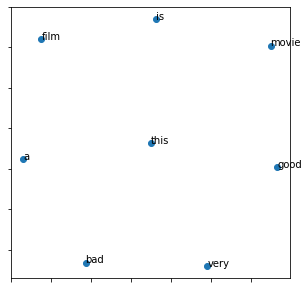

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

コーパスのクリーニングを行う

In [ ]:
# x_trainを全て小文字にする
x_train1 = list(map(str.lower,x_train))

In [ ]:
# 特殊な文字を削除
target="!"
target2="."
target3=","
target4="?"
list_a=[]
list_b=[]
list_c=[]
list_d=[]

# [!]を削除
for i in range(len(x_train1)):
  a = [item for item in x_train1[i] if item != target]
  b="".join(a)
  list_a.append(b)

# [.]を削除
for l in range(len(list_a)):
  a = [item for item in list_a[l] if item != target2]
  b="".join(a)
  list_b.append(b)

# [,]を削除
for l in range(len(list_b)):
  a = [item for item in list_b[l] if item != target3]
  b="".join(a)
  list_c.append(b)

# [?]を削除
for l in range(len(list_c)):
  a = [item for item in list_c[l] if item != target4]
  b="".join(a)
  list_d.append(b)

In [469]:
# リストで分割

X_train_sample=[]
for i in range(len(list_d)):
  da=list_d[i].strip().split()
  X_train_sample.append(da)

In [470]:
len(X_train_sample)

25000

In [ ]:
#import requests
#from bs4 import BeautifulSoup
#x_train2 = BeautifulSoup(x_train)

BeautifulSoupでHTMLHTMLタグの削除も行いたいが、うまくインストールができなかったため保留

【問題6】Word2Vecの学習  
学習を行ったのが下である

In [467]:
from gensim.models import Word2Vec
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(X_train1) # 準備
model.train(X_train1, total_examples=model.corpus_count, epochs=model.iter) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  after removing the cwd from sys.path.


(22429090, 29203110)